In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt







# Load datasets
train_df = pd.read_csv("C:/Users/s.pawara/Downloads/regression-tabular-california-housing/train.csv")
test_df = pd.read_csv("C:/Users/s.pawara/Downloads/regression-tabular-california-housing/test.csv")

# Display basic information
print("Train Data:")
print(train_df.info())
print("\nTest Data:")
print(test_df.info())



Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
id             37137 non-null int64
MedInc         37137 non-null float64
HouseAge       37137 non-null float64
AveRooms       37137 non-null float64
AveBedrms      37137 non-null float64
Population     37137 non-null float64
AveOccup       37137 non-null float64
Latitude       37137 non-null float64
Longitude      37137 non-null float64
MedHouseVal    37137 non-null float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 9 columns):
id            24759 non-null int64
MedInc        24759 non-null float64
HouseAge      24759 non-null float64
AveRooms      24759 non-null float64
AveBedrms     24759 non-null float64
Population    24759 non-null float64
AveOccup      24759 non-null float64
Latitude      24759 non-null float64
Longitude     24759 non-null flo

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been

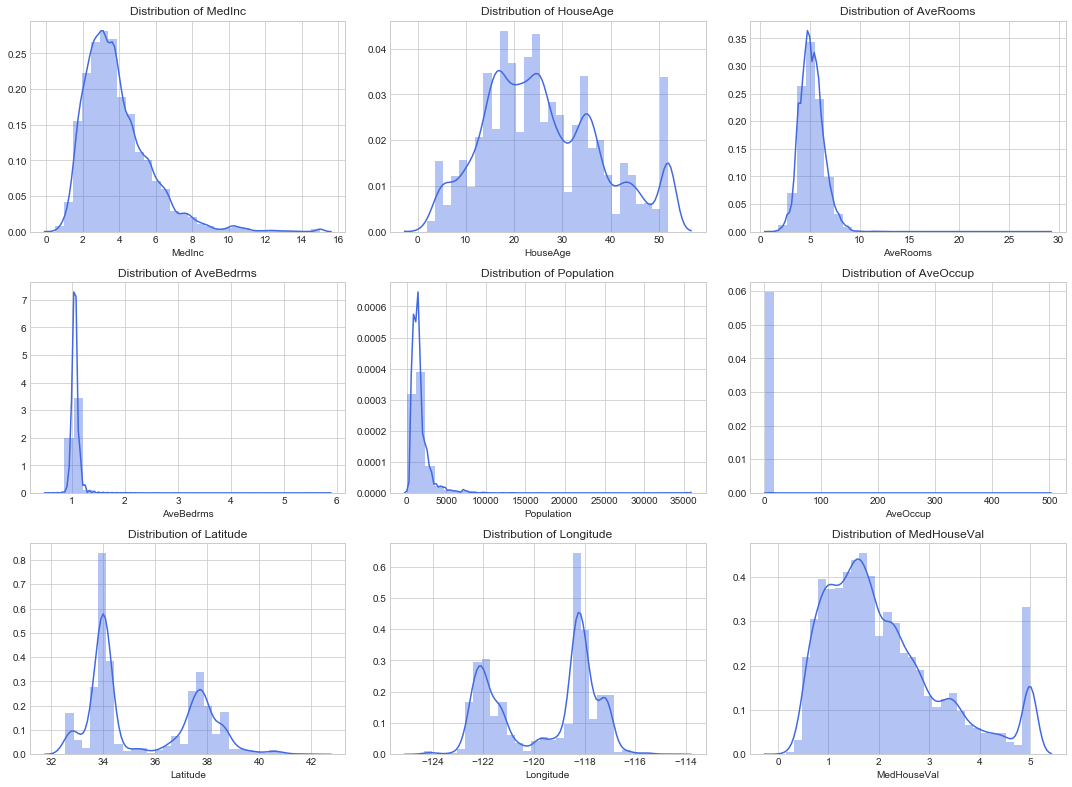

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# List of numerical features
num_features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude", "MedHouseVal"]

# Plot histograms with KDE
plt.figure(figsize=(15, 12))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.distplot(train_df[feature], kde=True, bins=30, color="royalblue")  # Use distplot instead
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


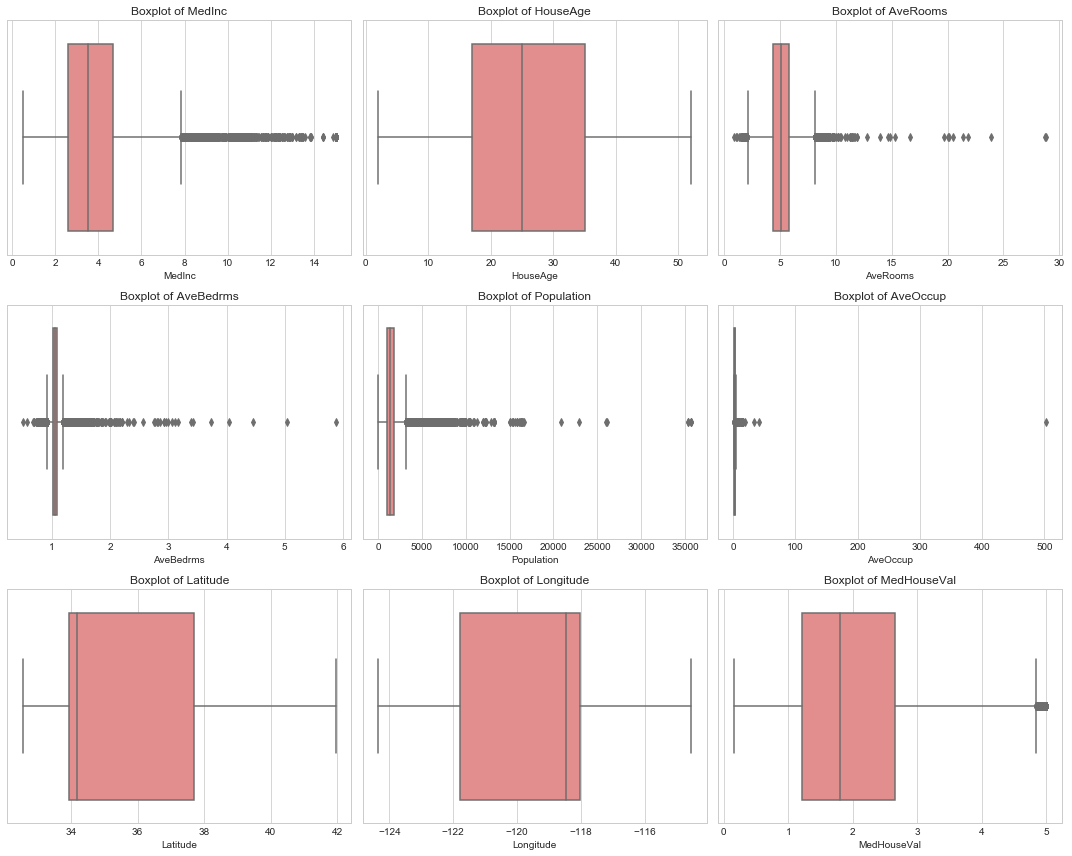

In [12]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=train_df[feature], color="lightcoral")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

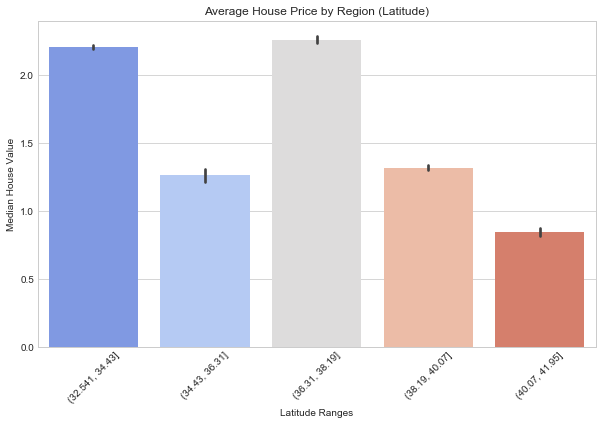

In [13]:
# Create Latitude-based categories
train_df["Latitude_Bins"] = pd.cut(train_df["Latitude"], bins=5)  # Divides Latitude into 5 ranges

plt.figure(figsize=(10, 6))
sns.barplot(x=train_df["Latitude_Bins"], y=train_df["MedHouseVal"], estimator=lambda x: x.mean(), palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average House Price by Region (Latitude)")
plt.xlabel("Latitude Ranges")
plt.ylabel("Median House Value")
plt.show()

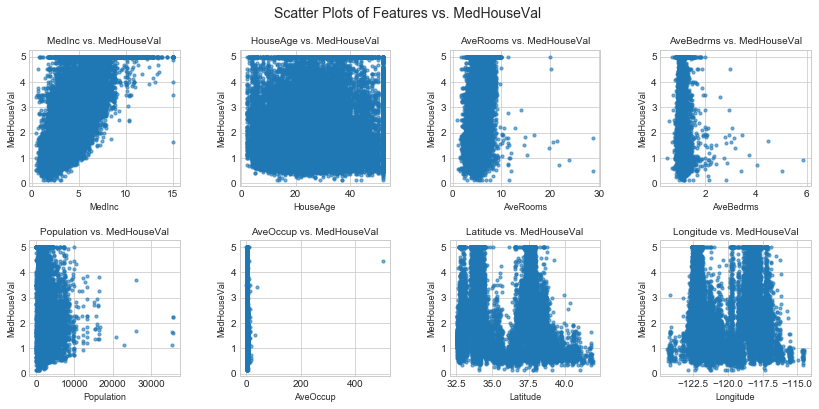

In [25]:
# Define grid layout
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(14, 6))  # Optimized figure size
fig.suptitle('Scatter Plots of Features vs. MedHouseVal', fontsize=14)  # Main title

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    axes[i].scatter(train_df[feature], train_df['MedHouseVal'], alpha=0.6, s=10)  # Smaller markers
    axes[i].set_title(f'{feature} vs. MedHouseVal', fontsize=10)
    axes[i].set_xlabel(feature, fontsize=9)
    axes[i].set_ylabel('MedHouseVal', fontsize=9)
    axes[i].grid(True)

# Hide any unused subplots (if fewer features than grid slots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better visibility
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust horizontal and vertical spacing
plt.show()


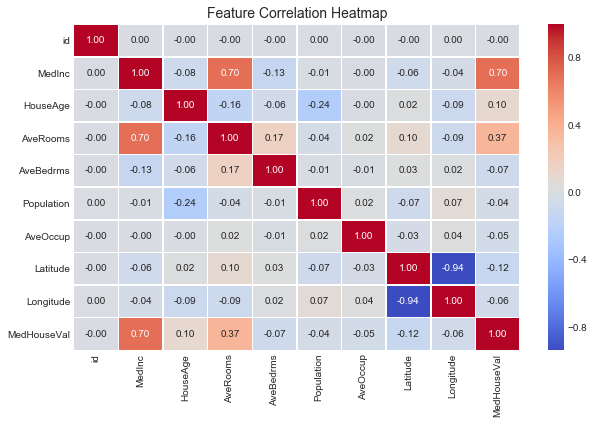

In [26]:
# Compute correlation matrix
corr_matrix = train_df.corr()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Set title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()


In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train_df['MedHouseVal'].quantile(0.25)
Q3 = train_df['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
train_df = train_df[(train_df['MedHouseVal'] >= lower_bound) & (train_df['MedHouseVal'] <= upper_bound)]

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [11]:
X_train = train_df.drop(columns=['id', 'MedHouseVal'], axis=1)
Y_train = train_df['MedHouseVal']
X_test = test_df.drop(columns='id', axis=1)


# Apply Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41
5,6.8075,26.0,6.764372,1.091787,2147.0,2.703540,33.84,-118.31
6,2.3654,21.0,4.734884,1.011396,1112.0,2.937247,35.65,-117.64
7,2.3562,31.0,5.186567,1.154229,1346.0,3.348259,32.68,-117.07
8,2.2672,23.0,4.640155,1.064302,628.0,1.774461,38.53,-121.43
9,5.6370,20.0,4.391863,1.053312,1634.0,2.681388,33.88,-118.36


In [19]:
# Prepare features and target variable
X = train_df.drop(columns=['id', 'MedHouseVal'], axis=1)
Y = train_df['MedHouseVal']
X_test = test_df.drop(columns=['id'], axis=1)

# Split the data into training and validation sets


X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)




In [28]:
pred_XGB = model_XGB.predict(X_test_scaled)

# Calculate RMSE
rmse_XGB = np.sqrt(mean_squared_error(Y_test, pred_XGB))

# Calculate R² Score
r2_XGB = r2_score(Y_test, pred_XGB)

# Print both scores
print(f"XGBoost RMSE: {rmse_XGB:.4f}")
print(f"XGBoost R² Score: {r2_XGB:.4f}")

XGBoost RMSE: 0.4716
XGBoost R² Score: 0.7256


In [9]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and train DecisionTreeRegressor with optimized parameters
model_DT = DecisionTreeRegressor(max_depth=8, min_samples_split=4, 
                                 min_samples_leaf=2, random_state=42)

model_DT.fit(X_train_scaled, Y_train)

# Make predictions
pred_DT = model_DT.predict(X_test_scaled)

rmse_DT = np.sqrt(mean_squared_error(Y_test, pred_DT))
print(f"Decision Tree RMSE: {rmse_DT:.4f}")

r2_DT = r2_score(Y_test, pred_DT)
print(f"Decision Tree R² Score: {r2_DT:.4f}")


Decision Tree RMSE: 0.7009
Decision Tree R² Score: 0.6387


In [23]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Gradient Boosting Regressor
model_GBR = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.05, 
                                      max_depth=8, subsample=0.8, random_state=42)

model_GBR.fit(X_train_scaled, Y_train)

# Make predictions
pred_GBR = model_GBR.predict(X_test_scaled)

# Compute RMSE
rmse_GBR = np.sqrt(mean_squared_error(Y_test, pred_GBR))
print(f"Gradient Boosting RMSE: {rmse_GBR:.4f}")

r2_GBR = r2_score(Y_test, pred_GBR)
print(f"Gradient Boosting R² Score: {r2_GBR:.4f}")

Gradient Boosting RMSE: 0.5219
Gradient Boosting R² Score: 0.7020


In [12]:
# Split dataset into train, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [6]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=8, random_state=42)),
    ('svr', SVR(kernel='rbf', C=100, gamma=0.1))
]

# Define meta-model (final estimator)
meta_model = Ridge(alpha=1.0)

# Initialize Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

# Train Stacking Model
stacking_model.fit(X_train_scaled, Y_train)

# Make predictions
pred_stacking = stacking_model.predict(X_test_scaled)

# Compute RMSE
rmse_stacking = np.sqrt(mean_squared_error(Y_test, pred_stacking))
print(f"Stacking Model RMSE: {rmse_stacking:.4f}")

r2_stacking = r2_score(Y_test, pred_stacking)
print(f"Stacking Model R² Score: {r2_stacking:.4f}")


Stacking Model RMSE: 0.6015
Stacking Model R² Score: 0.7339


In [22]:
# Make predictions
pred_XGB = model_XGB.predict(X_test_scaled)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Define hyperparameter grid for XGBoost
parameters = {
    "n_estimators": [500, 1000, 1500],  
    "learning_rate": [0.01, 0.05, 0.1],  
    "max_depth": [4, 6, 8, 10],  
    "subsample": [0.6, 0.8, 1.0],  
    "colsample_bytree": [0.6, 0.8, 1.0],  
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)

# GridSearchCV for hyperparameter tuning
gs = GridSearchCV(
    estimator=xgb_model,
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model with training data
gs.fit(X_train_scaled, Y_train)

# Get the best XGBRegressor model
best_xgb = gs.best_estimator_

# Predict on test data
y_pred = best_xgb.predict(X_test_scaled)

# Evaluate model performance on training data
rmse = np.sqrt(mean_squared_error(Y_train, best_xgb.predict(X_train_scaled)))
r2 = r2_score(Y_train, best_xgb.predict(X_train_scaled))

# Print results
print("\nBest XGBRegressor Model with GridSearchCV")
print("Best Parameters:", gs.best_params_)
print("RMSE on Training Set: {:.4f}".format(rmse))
print("R-squared on Training Set: {:.4f}".format(r2))

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [16]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12092,3.8583,52.0,4.926421,1.007740,988.0,2.682384,38.09,-122.21
31609,2.9647,25.0,4.717703,0.956522,1960.0,2.434879,38.68,-121.16
30447,1.5521,46.0,3.753210,1.057789,1715.0,1.658561,37.80,-122.25
5312,4.4792,21.0,5.502924,0.951941,1318.0,3.416107,33.69,-117.91
20437,1.6221,41.0,3.823129,1.110469,2195.0,3.734193,33.74,-118.25
34541,4.3750,26.0,5.737879,0.901515,861.0,3.181818,34.08,-117.95
11393,2.7222,27.0,3.781671,1.045822,1354.0,3.398866,33.97,-118.35
4272,4.3958,12.0,4.910638,1.148936,675.0,2.751064,37.37,-121.85
9334,4.0870,31.0,6.256484,1.076450,1503.0,2.845638,38.65,-121.22
25261,5.6818,27.0,6.029316,1.071483,1806.0,2.634361,37.28,-121.97


In [24]:
import pickle
from xgboost import XGBRegressor

# Save the trained model
with open('model_XGB.pkl', 'wb') as file:
    pickle.dump(model_XGB, file)

print("XGBRegressor model saved successfully!")


XGBRegressor model saved successfully!


In [25]:
import pickle
import numpy as np

# Load the saved XGB model
with open('model_XGB.pkl', 'rb') as file:
    model = pickle.load(file)

# Define a sample input (ensure it has the correct number of features)
sample = np.array([[2.3859, 15, 3.827160494, 1.112099644, 1280, 2.486988848, 34.6, -120.12]])

# Ensure data type consistency
sample = sample.astype(float)

# Make the prediction
prediction = model.predict(sample)
print("\nPredicted Price for sample:", prediction[0])



Predicted Price for sample: 2.0695767


In [46]:
import pandas as pd

# Read the sample submission file
sample_sub = pd.read_csv("C:/Users/s.pawara/Downloads/regression-tabular-california-housing/sample_submission.csv")

# Strip any leading or trailing whitespace in column names
sample_sub.columns = sample_sub.columns.str.strip()

# Print column names to ensure correctness
print(sample_sub.columns)

# Ensure pred_XGB has the correct number of predictions corresponding to sample_sub
if len(sample_sub) == len(pred_XGB):
    # Create the submission dataframe
    submission = pd.DataFrame({
        "id": sample_sub.id,
        "MedHouseVal": pred_XGB
    })
    
    # Save the submission to a CSV file
    submission.to_csv("C:/Users/s.pawara/Downloads/submissionmodeltestXGB.csv", index=False)

print("CSV file saved successfully.")

Index(['id', 'MedHouseVal'], dtype='object')
CSV file saved successfully.
